##   Rలో Pandas ఉపయోగం  
  Rలో pandas ఉపయోగాన్ని పరిష్కరించడానికి మనం dplyr లైబ్రరీని ఉపయోగించాలి. మనం సాధారణ డేటా సైన్స్ లైబ్రరీలను దిగుమతి చేసుకోవడం ప్రారంభిస్తాము


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

## సిరీస్


సిరీస్ అనేది ఒక జాబితా లేదా 1D-అర్రే లాంటిది, కానీ సూచికతో ఉంటుంది. అన్ని ఆపరేషన్లు సూచిక-సమన్వయంగా ఉంటాయి. R లో వరుస యొక్క సూచిక కోసం మనం row.names ఉపయోగించాలి.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


సిరీస్‌లలో ఒక సాధారణ ఉపయోగం టైమ్ సిరీస్. టైమ్ సిరీస్‌లో, సూచికకు ప్రత్యేకమైన నిర్మాణం ఉంటుంది - సాధారణంగా తేదీల లేదా తేదీ-సమయాల శ్రేణి. టైమ్ సిరీస్ సృష్టించడానికి ts ఫంక్షన్ ఉపయోగించడం సులభమైన మార్గం. కానీ మేము టైమ్ సిరీస్‌ను అమలు చేయడానికి మరో మార్గాన్ని ప్రయత్నించబోతున్నాము. seq ఫంక్షన్ ఉపయోగించి తేదీల సూచికను సృష్టించడానికి మేము lubridate లైబ్రరీని ఉపయోగించాలి.

ప్రతి రోజు కొనుగోలు చేసిన ఉత్పత్తి పరిమాణాన్ని చూపించే సిరీస్ ఉందని మరియు ప్రతి ఆదివారం మేము కూడా ఒక అదనపు అంశాన్ని తీసుకోవాల్సి ఉంటుందని తెలుసుకున్నాం. సిరీస్ ఉపయోగించి దీన్ని ఎలా మోడల్ చేయాలో ఇక్కడ ఉంది:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


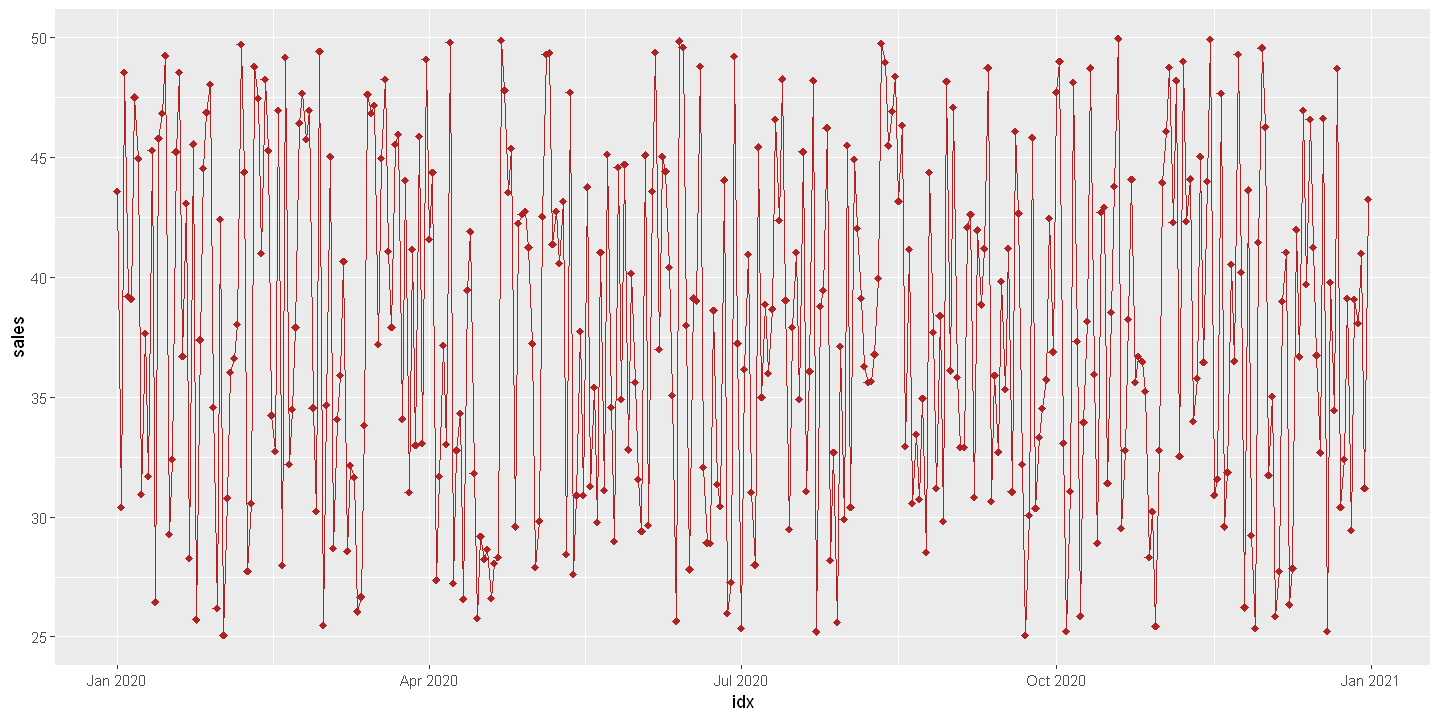

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

మేము మొత్తం ఉత్పత్తుల సంఖ్యను కనుగొనడానికి additional_items మరియు sold_items ను విలీనం చేస్తున్నాము.  
మీరు చూడగలిగినట్లుగా, మొత్తం కనుగొనడంలో ఇక్కడ సమస్యలు ఉన్నాయి, మేము NaN విలువను పొందుతున్నాము ఎందుకంటే వారానికి సంబంధించిన సిరీస్‌లో పేర్కొనబడని రోజులు మిస్సింగ్ (NaN) గా పరిగణించబడతాయి, NaN ను సంఖ్యకు జోడిస్తే అది మాకు NaN ఇస్తుంది.  
జోడించడానికి, మేము NaN ను 0 తో మార్చాలి.


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

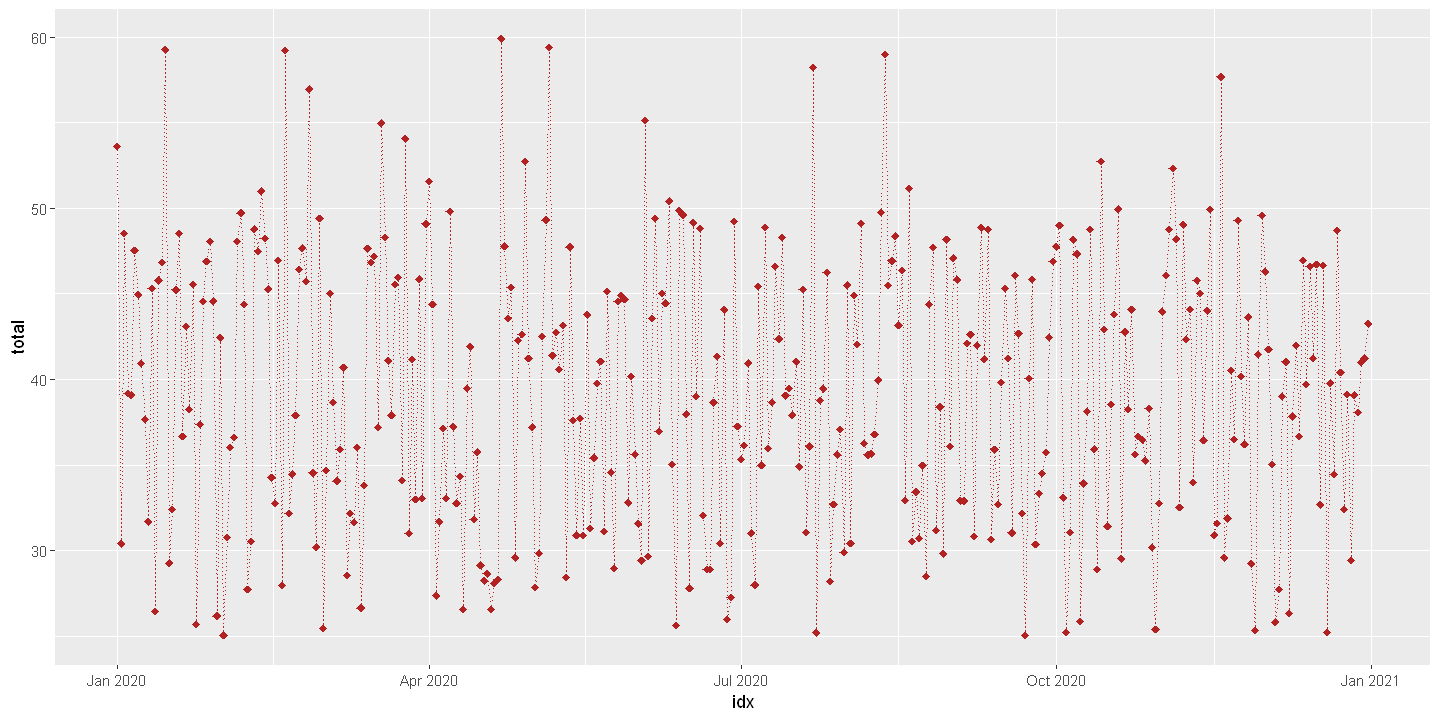

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

మేము నెలవారీ ఆధారంగా మొత్తం ఉత్పత్తుల సంఖ్యను విశ్లేషించాలనుకుంటున్నాము. అందువల్ల, ఒక నెలలో మొత్తం ఉత్పత్తుల సంఖ్య యొక్క సగటును కనుగొని, ఒక బార్ గ్రాఫ్‌ను చిత్రిస్తాము.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

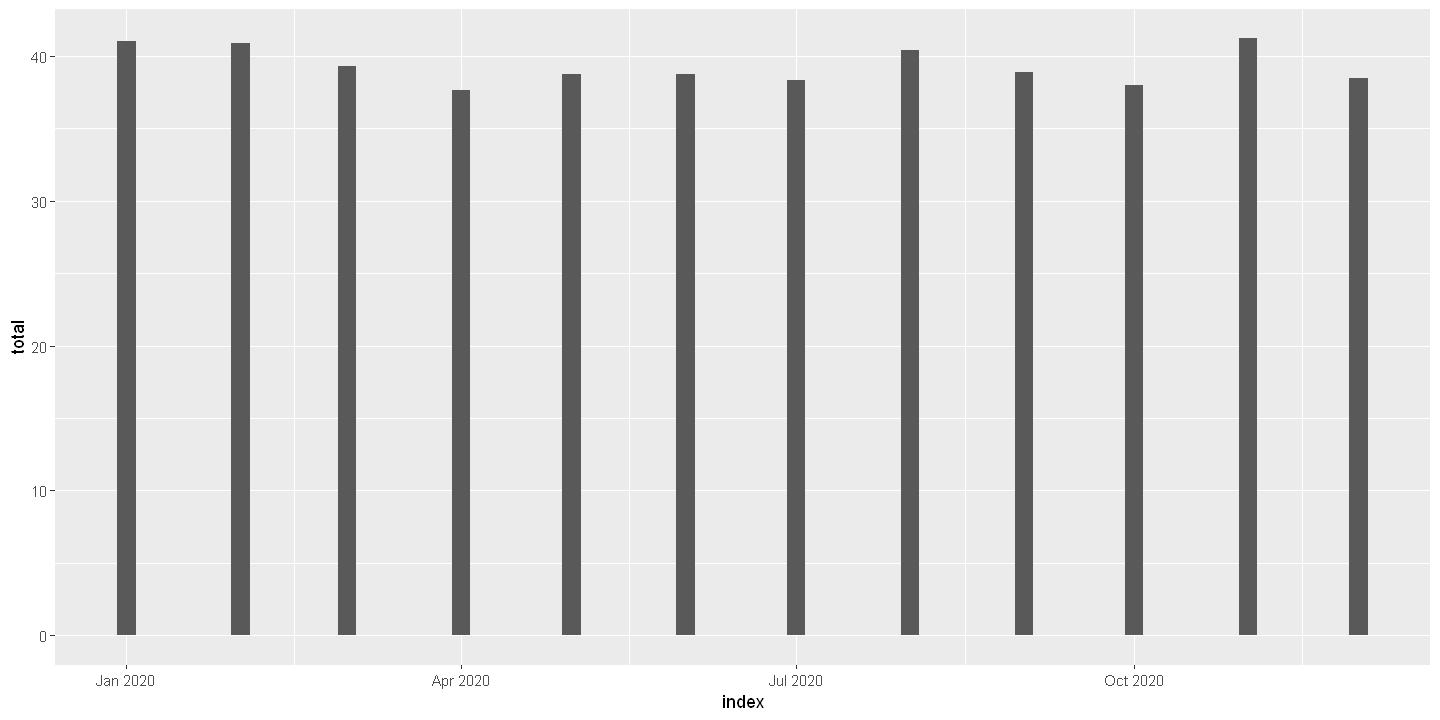

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## DataFrame
డేటాఫ్రేమ్ అనేది మౌలికంగా ఒకే సూచికతో ఉన్న సిరీస్‌ల సేకరణ. మనం అనేక సిరీస్‌లను కలిపి ఒక డేటాఫ్రేమ్‌గా మార్చవచ్చు.  
ఉదాహరణకు, మనం a మరియు b సిరీస్‌ల డేటాఫ్రేమ్‌ను తయారు చేస్తున్నాము.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

మేము rename ఫంక్షన్ ఉపయోగించి కాలమ్ పేరును కూడా మార్చవచ్చు.


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

మేము select ఫంక్షన్ ఉపయోగించి డేటాఫ్రేమ్‌లో ఒక కాలమ్‌ను కూడా ఎంచుకోవచ్చు.


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

మేము సిరీస్‌పై ఒక నిర్దిష్ట తార్కిక ప్రమాణాన్ని తీరుస్తున్న వరుసలను తీసుకుంటాము.


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

కొత్త కాలమ్స్ సృష్టించడం.

క్రింది కోడ్ ఒక సిరీస్‌ను సృష్టిస్తుంది, ఇది a యొక్క సగటు విలువ నుండి వ్యత్యాసాన్ని లెక్కిస్తుంది, ఆపై దాన్ని ఉన్న డేటాఫ్రేమ్‌లో విలీనం చేస్తుంది.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

మేము A కాలమ్ స్ట్రింగ్ పొడవును లెక్కించి, దాన్ని ఉన్న డేటాఫ్రేమ్‌లో విలీనం చేసే సిరీస్‌ను సృష్టిస్తున్నాము.


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

సంఖ్యల ఆధారంగా వరుసలను ఎంపిక చేయడం


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***గ్రూపింగ్ అంటే కొన్ని షరతుల ఆధారంగా బహుళ కాలమ్స్‌ను గ్రూప్ చేయడం మరియు తేడాను చూడటానికి summarise ఫంక్షన్‌ను ఉపయోగిస్తాము***

ఒక ఉదాహరణగా, మనం ప్రతి ఇచ్చిన LenB సంఖ్య కోసం కాలమ్ A యొక్క సగటు విలువను లెక్కించాలనుకుంటే, మనం మన DataFrame ను LenB ద్వారా గ్రూప్ చేసి, సగటును కనుగొని వాటిని a అని పేరు పెట్టవచ్చు.


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## ముద్రణ మరియు ప్లాటింగ్
మనం head(df) ను పిలిచినప్పుడు అది డేటాఫ్రేమ్‌ను పట్టిక రూపంలో ముద్రిస్తుంది.

ఏదైనా డేటా సైన్స్ ప్రాజెక్ట్ యొక్క మొదటి దశ డేటా శుభ్రపరిచే మరియు విజువలైజేషన్, కాబట్టి డేటాసెట్‌ను విజువలైజ్ చేయడం మరియు కొన్ని ఉపయోగకరమైన సమాచారాన్ని తీసుకోవడం ముఖ్యం.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 అనేది ఒక చాలా మంచి లైబ్రరీ, ఎందుకంటే ఇది డేటా ఫ్రేమ్‌లోని డేటా నుండి సంక్లిష్టమైన ప్లాట్లను సులభంగా సృష్టించడానికి అనుకూలంగా ఉంటుంది.

ఇది ఏ వేరియబుల్స్‌ను ప్లాట్ చేయాలో, అవి ఎలా ప్రదర్శించబడాలో, మరియు సాధారణ దృశ్య లక్షణాలు ఏమిటో నిర్దేశించడానికి మరింత ప్రోగ్రామాటిక్ ఇంటర్‌ఫేస్‌ను అందిస్తుంది.


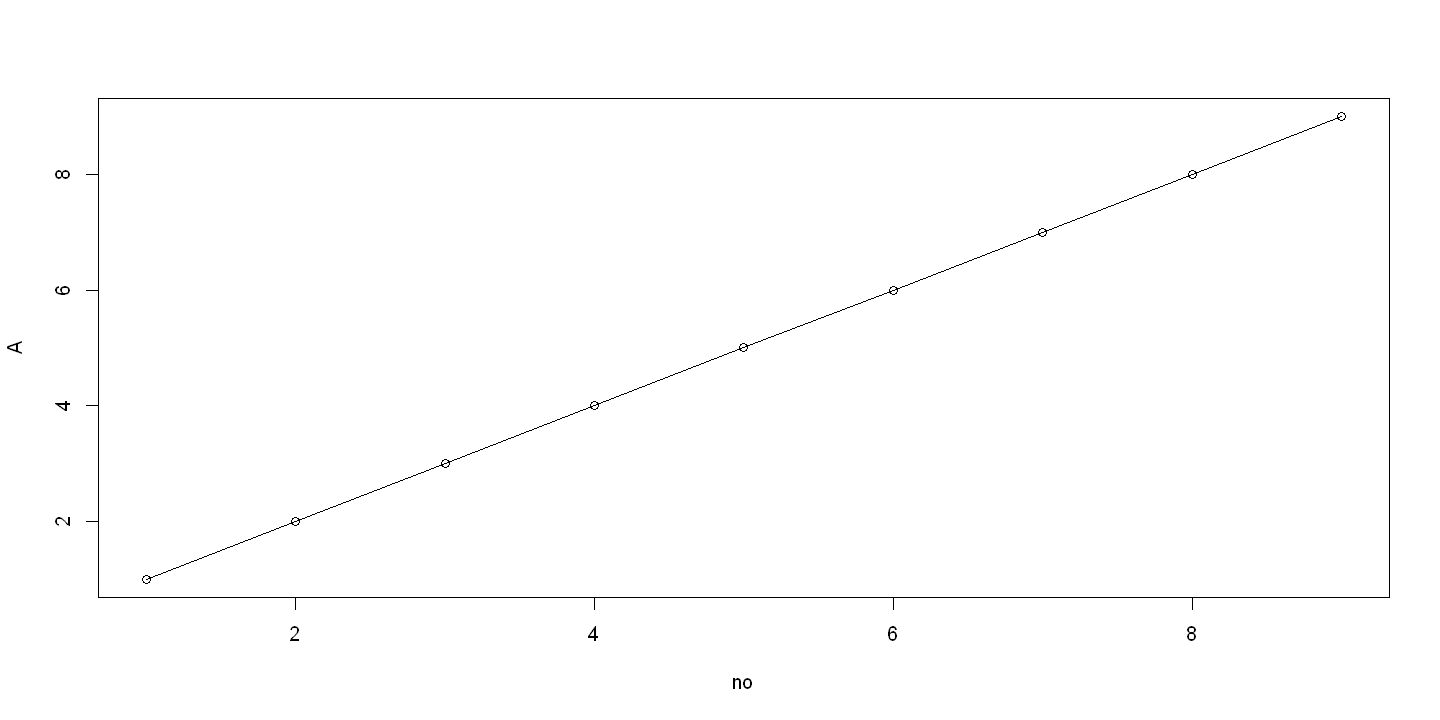

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

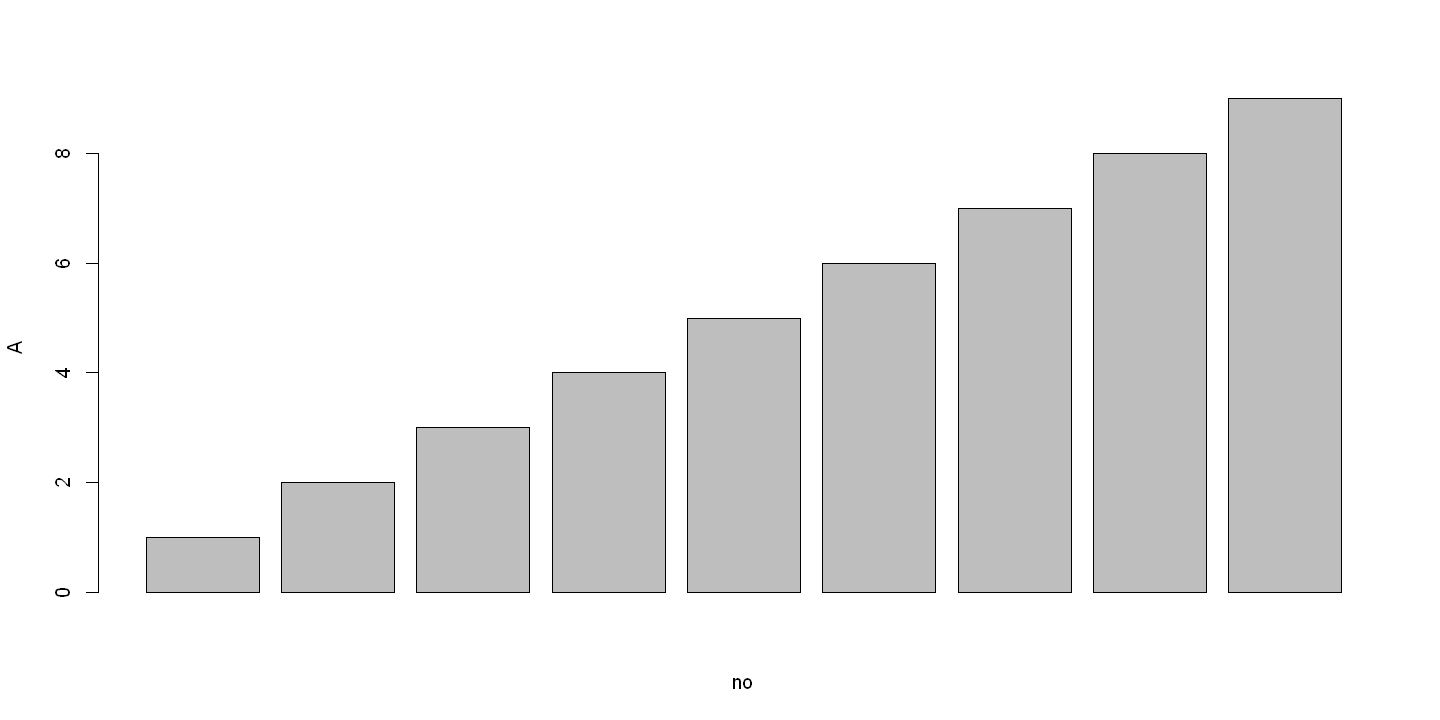

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')

---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**అస్పష్టత**:  
ఈ పత్రాన్ని AI అనువాద సేవ [Co-op Translator](https://github.com/Azure/co-op-translator) ఉపయోగించి అనువదించబడింది. మేము ఖచ్చితత్వానికి ప్రయత్నించినప్పటికీ, ఆటోమేటెడ్ అనువాదాల్లో పొరపాట్లు లేదా తప్పిదాలు ఉండవచ్చు. మూల పత్రం దాని స్వదేశీ భాషలో అధికారిక మూలంగా పరిగణించాలి. ముఖ్యమైన సమాచారానికి, ప్రొఫెషనల్ మానవ అనువాదం సిఫార్సు చేయబడుతుంది. ఈ అనువాదం వాడకంలో ఏర్పడిన ఏవైనా అపార్థాలు లేదా తప్పుదారితీసే అర్థాలు కోసం మేము బాధ్యత వహించము.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
